## Employee Absenteeism

### Load the Libraries and Dataset

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [153]:
emp_df = pd.read_csv("./absenteeism.csv")
emp_df_copy = emp_df

In [154]:
emp_df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   Hit target  Disciplinary failure  Education  Son  \
0                 239.554          97                     0          1    2   
1                 239.554          97                     1          1    1   
2                 239.554          97                     0          1    0   
3                 239.554          97                     0          1    2   
4                 239.554          97                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2

In [155]:
emp_df_copy.shape

(740, 21)

#### Column description

#### Categorical Features
Reason for absence <br>
Month of Absence    <br>
Day of the week <br>
Seasons<br>
Disciplinary failure<br>
Education<br>
Social drinker<br>
Social smoker

#### Numerical Features
ID<br>
Transportation Expense<br>
Distance from Residence to Work<br>
Service time<br>
Age<br>
Work load<br>
Hit target<br>
Son<br>
Pet<br>
Weight<br>
Height<br>
Body mass index<br>

In [156]:
emp_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

#### Changes in the records of Work load Average/day:

In [157]:
#first convert to string so that we can remove the commas
emp_df_copy["Work load Average/day "] = emp_df_copy["Work load Average/day "].astype('str')
emp_df_copy["Work load Average/day "] = emp_df_copy["Work load Average/day "].replace(',','')

#now to convert string to numeric type, we use to_numeric of pandas
emp_df_copy["Work load Average/day "] = pd.to_numeric(emp_df_copy["Work load Average/day "], errors='coerce')

##### Check for NULL values

In [158]:
emp_df_copy.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [159]:
emp_df_copy.describe()

ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service time         Age  Work load Average/day   Hit target  \
count    740.000000  740.000000              740.000000  740.000000   
mean      12.554054   36.450000              271.490235   94.587838   
std        4.384873    6.478772               39.058116    3.779313   
min        1.000000   27.000000              205.917000   81.000000   
25%        9.000000   31.000000              244.387000   93.000000   
50%       13.000000   37.000000              264.249000   95.000000   
75%       16.000000   40.000000              294.217000   97.000000   
max       29.000000   58.000000              378.884000  100.000000   

       Disciplinary failure   Education         Son  Social drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social smoker         Pet      Weight      Height  Body mass index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism time in hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000

In [160]:
emp_df_copy['Disciplinary failure'].value_counts()

Disciplinary failure
0    700
1     40
Name: count, dtype: int64

In [161]:
emp_df_copy['Reason for absence'].value_counts()

Reason for absence
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: count, dtype: int64

#### Univariate Analysis

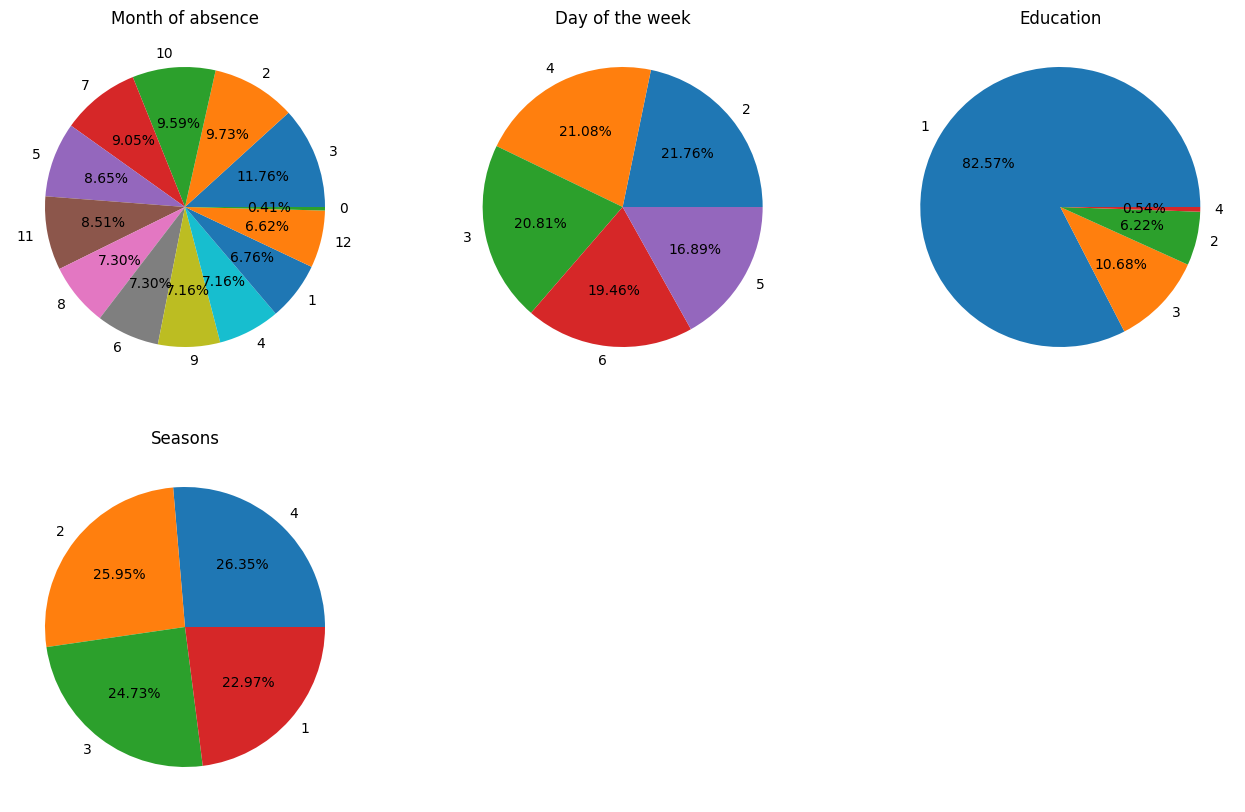

In [162]:
plt.figure(figsize=(16,10))

plt.subplot(231)
plt.axis('off')
plt.title('Month of absence')
emp_df_copy['Month of absence'].value_counts().plot(kind='pie',autopct = '%.2f%%')

plt.subplot(232)
plt.axis('off')
plt.title('Day of the week')
emp_df_copy['Day of the week'].value_counts().plot(kind='pie',autopct = '%.2f%%')

plt.subplot(233)
plt.axis('off')
plt.title('Education')
emp_df_copy['Education'].value_counts().plot(kind='pie',autopct = '%.2f%%')

plt.subplot(234)
plt.axis('off')
plt.title('Seasons')
emp_df_copy['Seasons'].value_counts().plot(kind='pie',autopct = '%.2f%%')
plt.show()

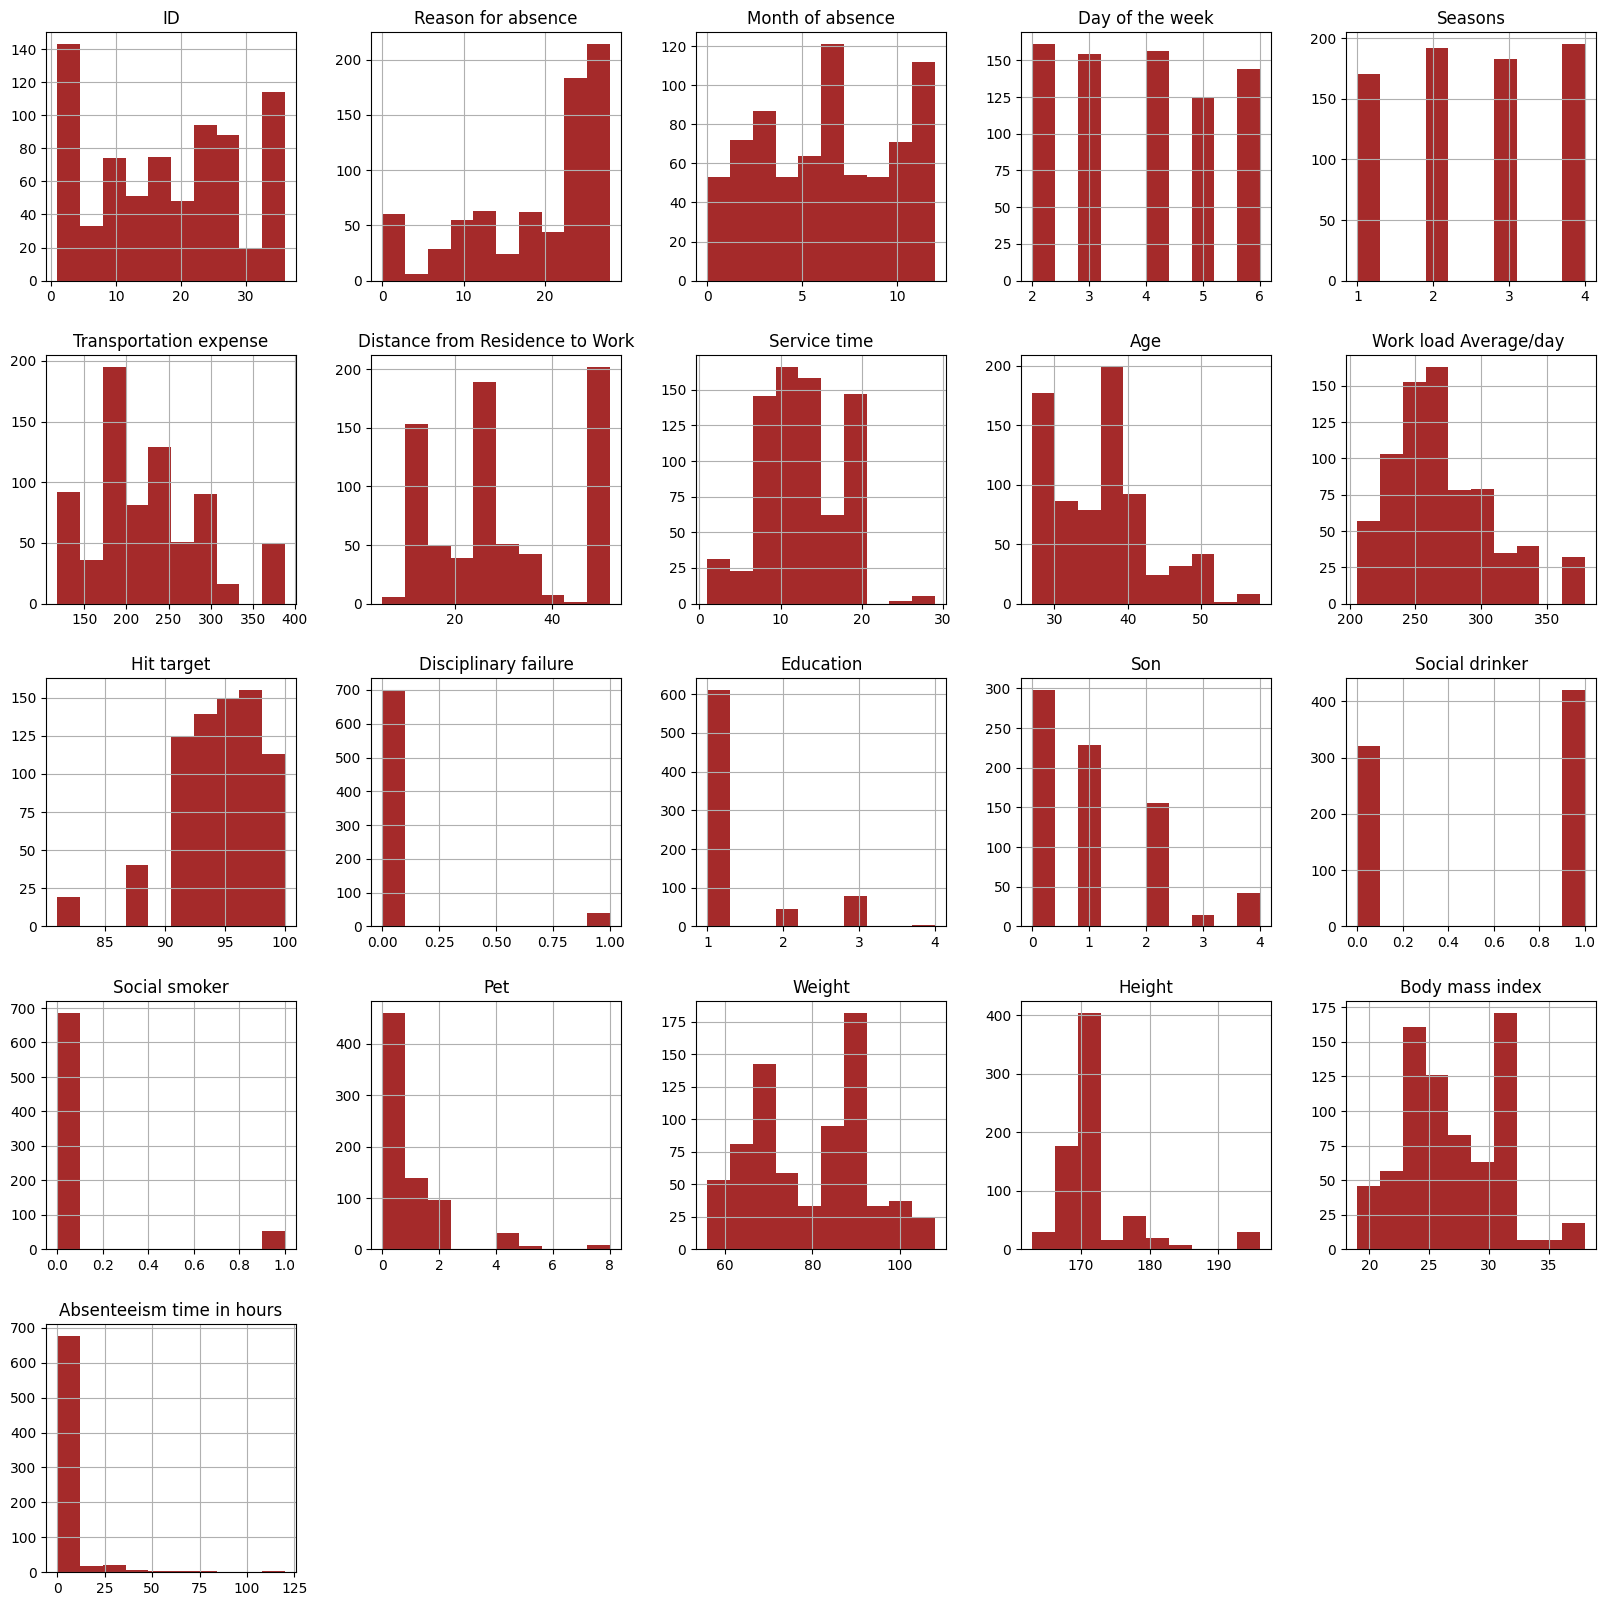

In [163]:
emp_df_copy.hist(linewidth=1, histtype='stepfilled', facecolor='brown', figsize=(20, 20));

#### Bivariate Analysis

##### Grouped the data according to Reason for Absence to find count of employees for each Reason

In [164]:
grouped_reason=emp_df_copy.groupby('Reason for absence')
grouped_reason['Absenteeism time in hours'].count()

Reason for absence
0      43
1      16
2       1
3       1
4       2
5       3
6       8
7      15
8       6
9       4
10     25
11     26
12      8
13     55
14     19
15      2
16      3
17      1
18     21
19     40
21      6
22     38
23    149
24      3
25     31
26     33
27     69
28    112
Name: Absenteeism time in hours, dtype: int64

In [165]:
# Build an array for absenteeism in hours grouped by reason for absence frequency 

arr=grouped_reason['Absenteeism time in hours'].count()
arr=np.array(arr)
print(arr)

[ 43  16   1   1   2   3   8  15   6   4  25  26   8  55  19   2   3   1
  21  40   6  38 149   3  31  33  69 112]


##### Plot the Count of employees according to each reason

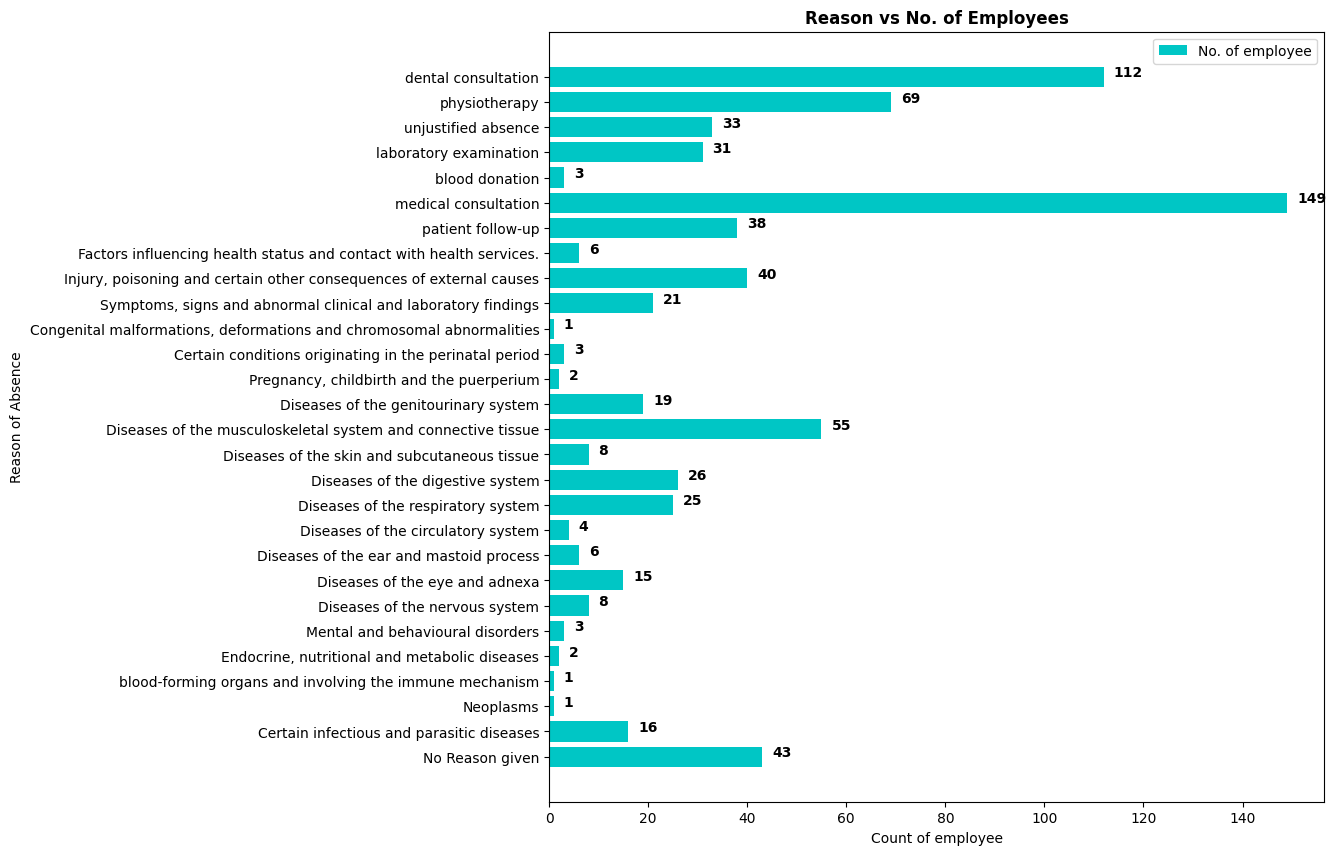

In [166]:
fig, ax = plt.subplots(figsize=(10,10))

table=[
    'No Reason given',
    'Certain infectious and parasitic diseases', 
    'Neoplasms', 
    'blood-forming organs and involving the immune mechanism', 
    'Endocrine, nutritional and metabolic diseases', 
    'Mental and behavioural disorders', 
    'Diseases of the nervous system', 
    'Diseases of the eye and adnexa', 
    'Diseases of the ear and mastoid process', 
    'Diseases of the circulatory system', 
    'Diseases of the respiratory system', 
    'Diseases of the digestive system', 
    'Diseases of the skin and subcutaneous tissue', 
    'Diseases of the musculoskeletal system and connective tissue', 
    'Diseases of the genitourinary system',
    'Pregnancy, childbirth and the puerperium',
    'Certain conditions originating in the perinatal period',
    'Congenital malformations, deformations and chromosomal abnormalities', 
    'Symptoms, signs and abnormal clinical and laboratory findings', 
    'Injury, poisoning and certain other consequences of external causes', 
    'Factors influencing health status and contact with health services.',
    'patient follow-up',
    'medical consultation',
    'blood donation',
    'laboratory examination',
    'unjustified absence',
    'physiotherapy',
    'dental consultation']

plt.barh(y=np.arange(len(arr)),width=arr,label='No. of employee',color='#00C6C5')
plt.yticks(np.arange(len(arr)),table,rotation=0)
plt.ylabel('Reason of Absence')
plt.xlabel('Count of employee')
plt.title('Reason vs No. of Employees',fontweight='bold')
plt.legend()
for i, v in enumerate(arr):
    ax.text(v+2, i, str(v), color='black',fontweight='bold')
plt.show()

#### New Reason for Absence column as there are more than 21 categories

In [167]:
reason= {"Reason of Absence":    {
                                  "Neoplasms": 1,
                                  "blood-forming organs and involving the immune mechanism": 2,
                                  "Endocrine, nutritional and metabolic diseases": 3,
                                  "Mental and behavioural disorders": 4,
                                  "Diseases of the nervous system": 5,
                                  "Diseases of the eye and adnexa": 6,
                                  "Diseases of the ear and mastoid process": 7,
                                  "Diseases of the ear and mastoid process": 8, 
                                  "Diseases of the circulatory system": 9,
                                  "Diseases of the respiratory system": 10,
                                  "Diseases of the digestive system": 11,
                                  "Diseases of the skin and subcutaneous tissue": 12,
                                  "Diseases of the musculoskeletal system and connective tissue": 13,
                                  "Diseases of the genitourinary system": 14,
                                  "Pregnancy child birth and the puerperium": 15,
                                  "Certain conditions originating in the perinatal period": 16,
                                  "Congenital malformations": 17, 
                                  "Deformations and chromosomal abnormalities": 18,
                                  "Symptoms, signs and abnormal clinical and laboratory findings":19, 
                                  "Injury, poisoning and certain other consequences of external causes":20,
                                  "Factors influencing health status and contact with health services": 21,
                                  "patient follow-up": 22,
                                  "medical consultation": 23,
                                  "blood donation": 24,
                                  "laboratory examination": 25,
                                  "unjustified absence": 26,"physiotherapy":  27,
                                  "dental consultation": 28,"No Reason given": 29,
                                  "Certain infectious and parasitic diseases": 30
                                  }}
                



 

In [168]:
emp_df_copy = emp_df_copy.replace(reason)
emp_df_copy.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   Hit target  Disciplinary failure  Education  Son  \
0                 239.554          97                     0          1    2   
1                 239.554          97                     1          1    1   
2                 239.554          97                     0          1    0   
3                 239.554          97                     0          1    2   
4                 239.554          97                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2

##### Month of Absence VS Absenteeism

<AxesSubplot:xlabel='Month of absence', ylabel='Absenteeism time in hours'>

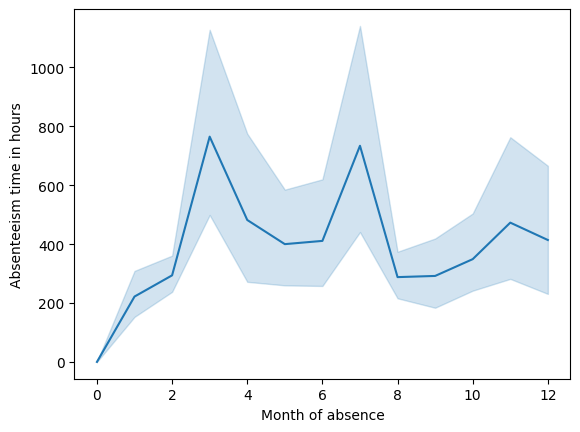

In [169]:
#we use SUM of the values of each month as an estimator (height of the line at different points)
sns.lineplot(x = 'Month of absence', y =  'Absenteeism time in hours', data = emp_df_copy, estimator = sum)

#### Check some features for Outlier Treatment

<AxesSubplot:xlabel='Distance from Residence to Work', ylabel='Density'>

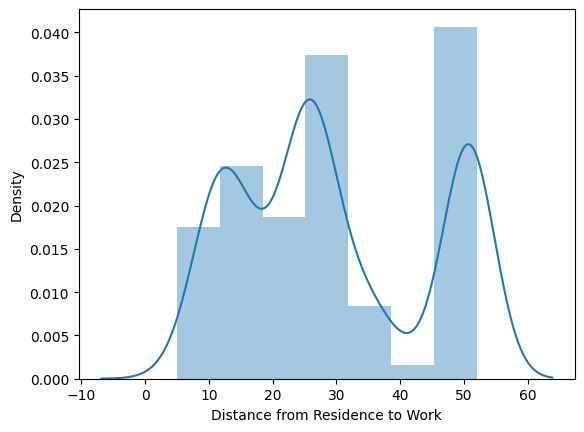

In [170]:
sns.distplot(emp_df_copy['Distance from Residence to Work'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

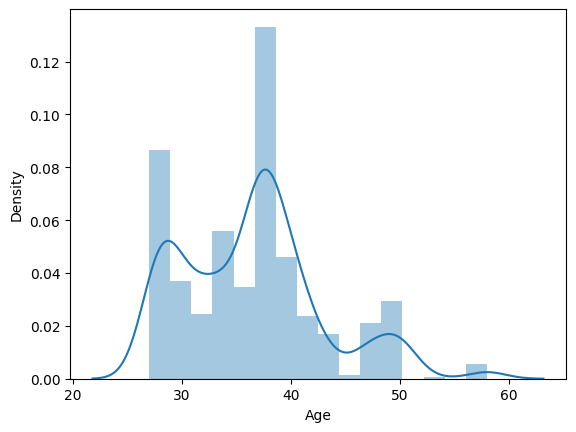

In [171]:
sns.distplot(emp_df_copy['Age'])

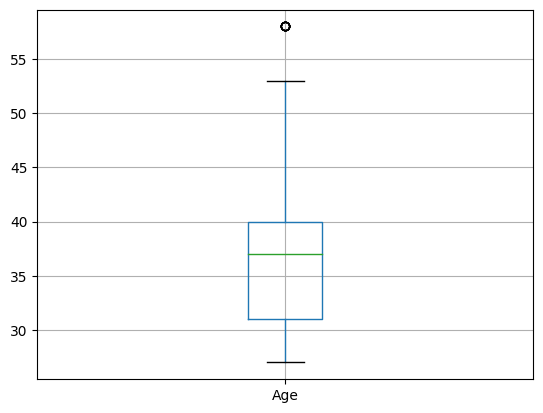

In [172]:
figure=emp_df_copy.boxplot(column="Age")

In [173]:
emp_df_copy.loc[emp_df_copy['Age']>=55,'Age']=55

<AxesSubplot:xlabel='Age', ylabel='Density'>

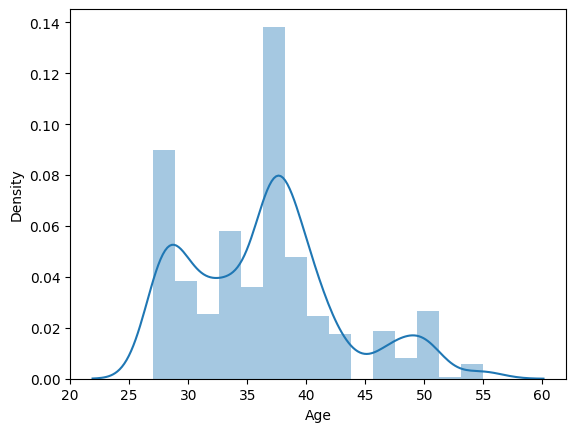

In [174]:
sns.distplot(emp_df_copy['Age'])

#### Correlation Matrix

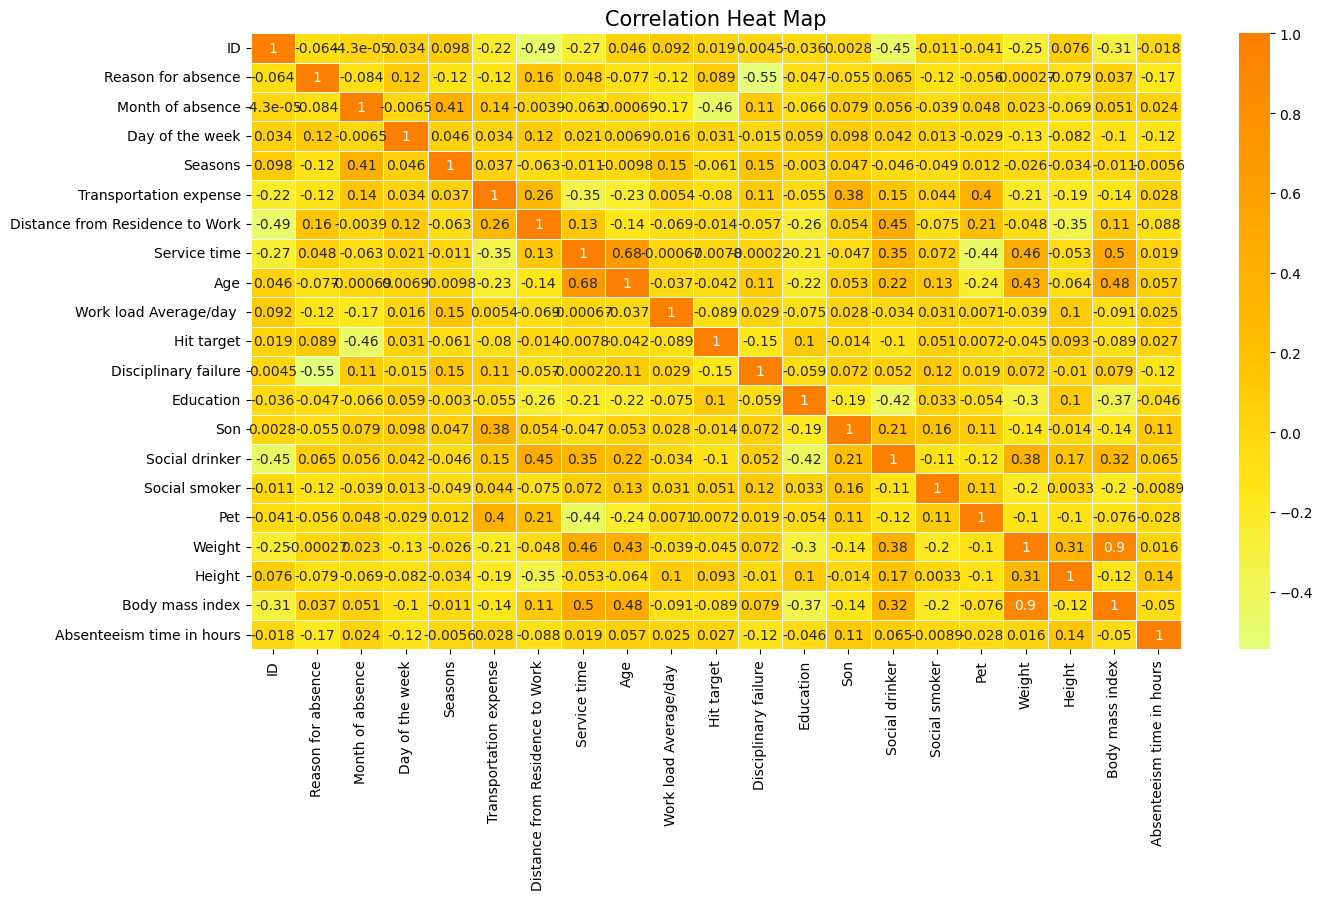

In [175]:
plt.figure(figsize=(15,8))
sns.heatmap(emp_df_copy.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [176]:
emp_df_copy.corr()['Absenteeism time in hours'].sort_values()

Reason for absence                -0.173116
Day of the week                   -0.124361
Disciplinary failure              -0.124248
Distance from Residence to Work   -0.088363
Body mass index                   -0.049719
Education                         -0.046235
Pet                               -0.028277
ID                                -0.017997
Social smoker                     -0.008936
Seasons                           -0.005615
Weight                             0.015789
Service time                       0.019029
Month of absence                   0.024345
Work load Average/day              0.024749
Hit target                         0.026695
Transportation expense             0.027585
Age                                0.056940
Social drinker                     0.065067
Son                                0.113756
Height                             0.144420
Absenteeism time in hours          1.000000
Name: Absenteeism time in hours, dtype: float64

#### Forming the Group of Absenteeism hours
x <= 4hours -> 1 (Half Day leave)  <br>
4 hours < x -> 2 (Full Day/Several Day leave) <br>

In [177]:
group_hours = []

for i,r in emp_df_copy.iterrows():
    if r["Absenteeism time in hours"] <= 4: group_hours.append(1)
    # elif r["Absenteeism time in hours"] <= 8: group_hours.append(2)
    else: group_hours.append(2)

emp_df_copy["Group Hours"] = group_hours
emp_df_copy.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   Hit target  Disciplinary failure  Education  Son  \
0                 239.554          97                     0          1    2   
1                 239.554          97                     1          1    1   
2                 239.554          97                     0          1    0   
3                 239.554          97                     0          1    2   
4                 239.554          97                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  Group Hours  
0                          4            1  
1                          0            1  
2                          2            1  
3                          4            1  
4                          2            1

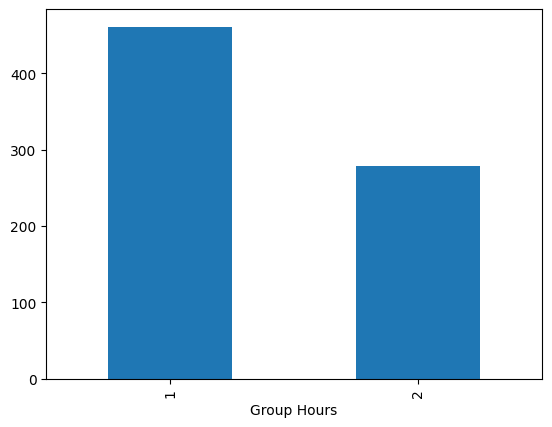

In [178]:
emp_df_copy["Group Hours"].value_counts().plot(kind = "bar")
plt.show()


<AxesSubplot:>

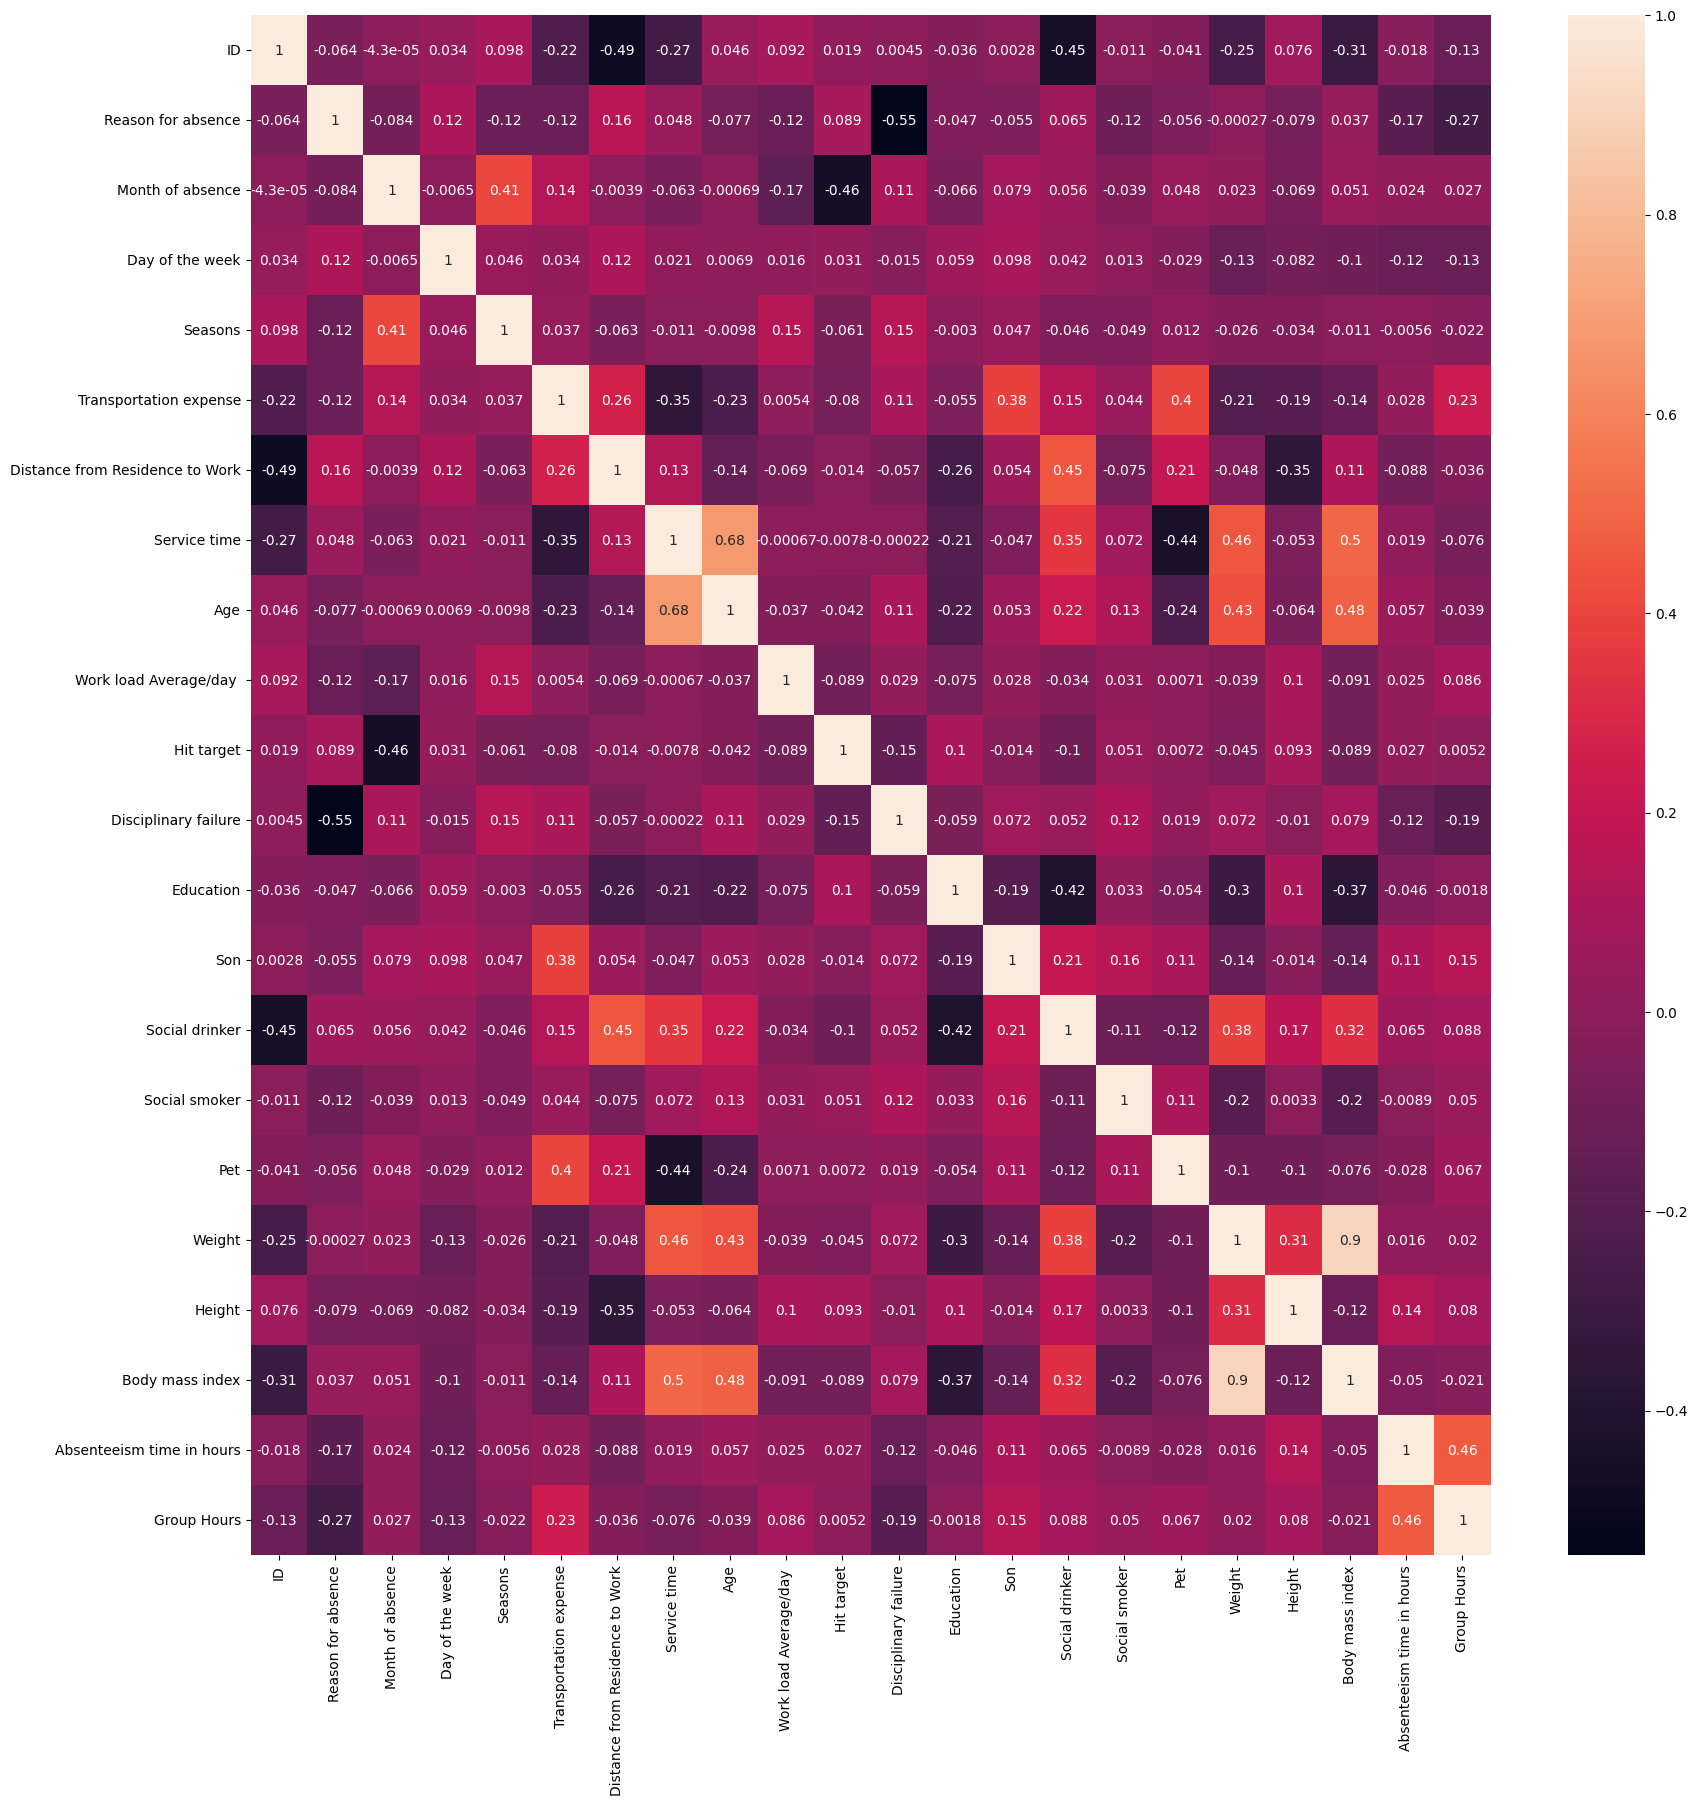

In [179]:
fig = plt.subplots(figsize=(20,20))
sns.heatmap(emp_df_copy.corr(), annot = True)

#### Bivariate Analysis:
Features VS Group Hours

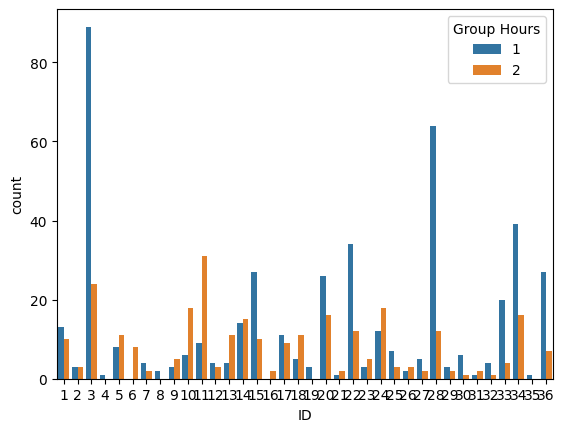

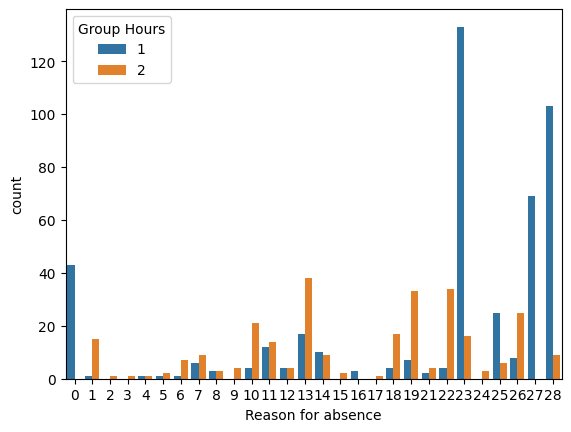

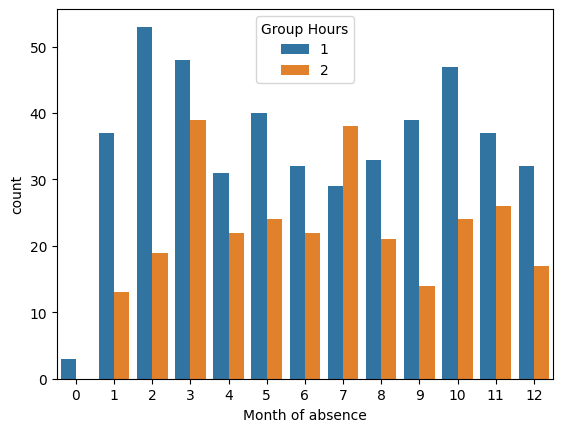

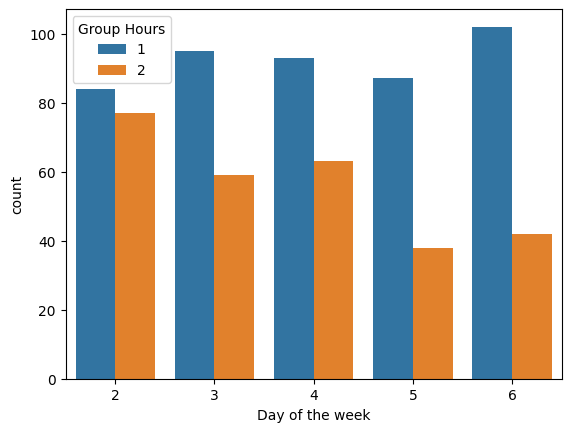

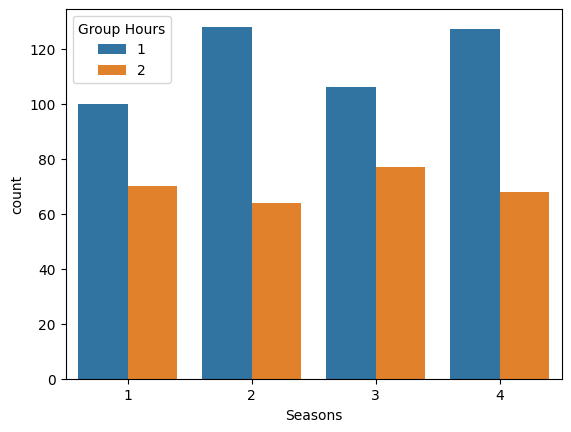

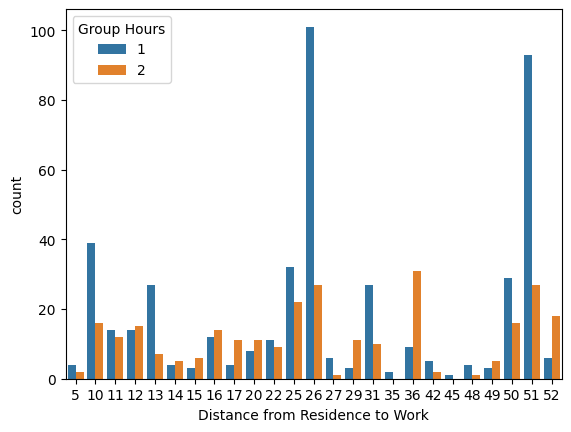

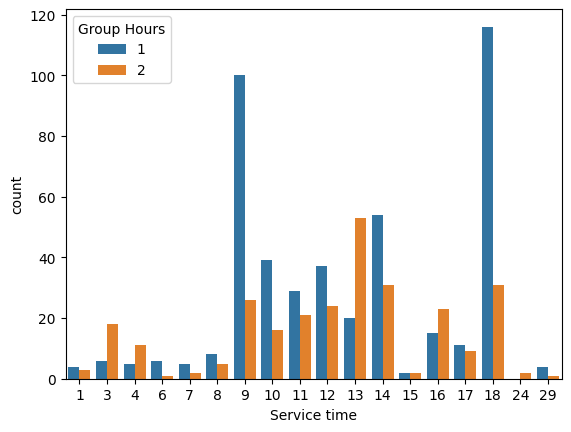

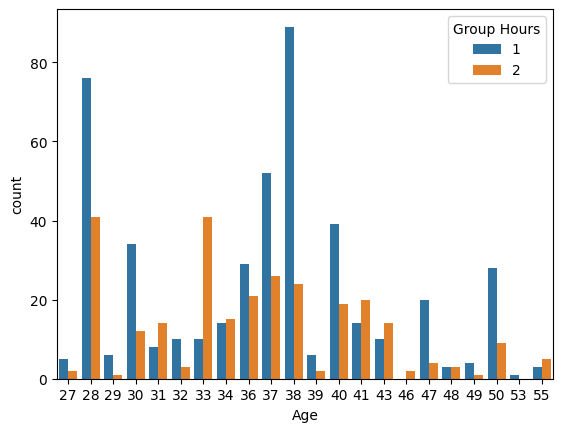

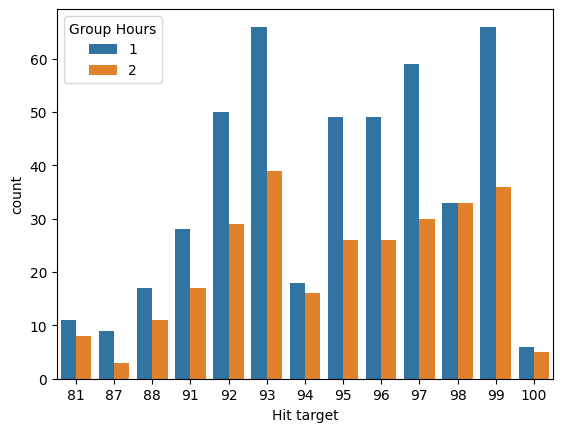

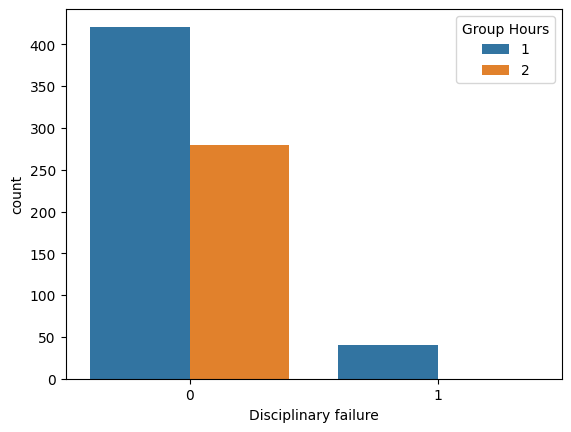

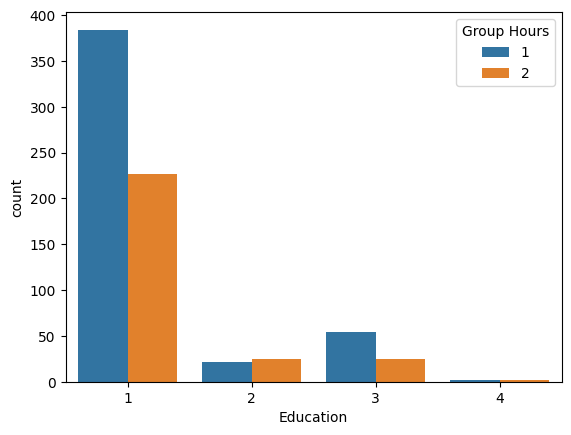

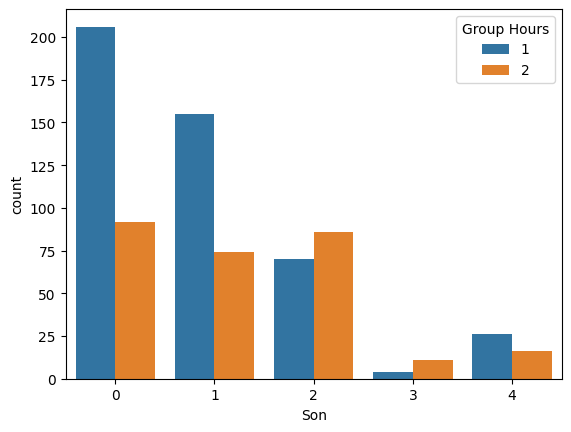

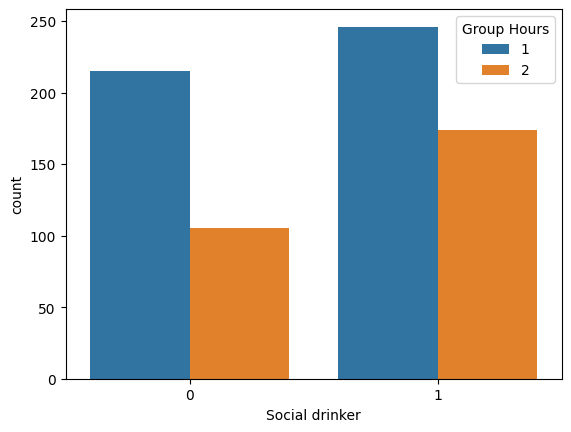

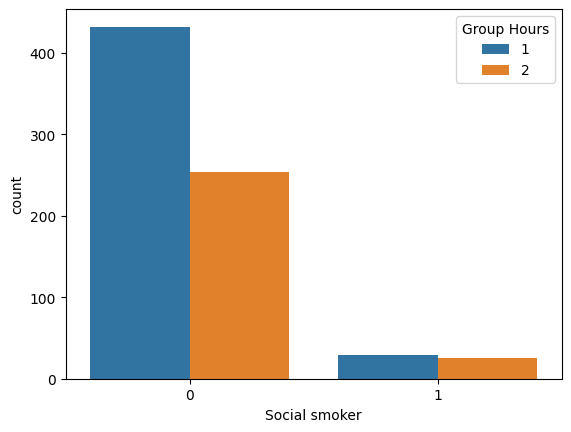

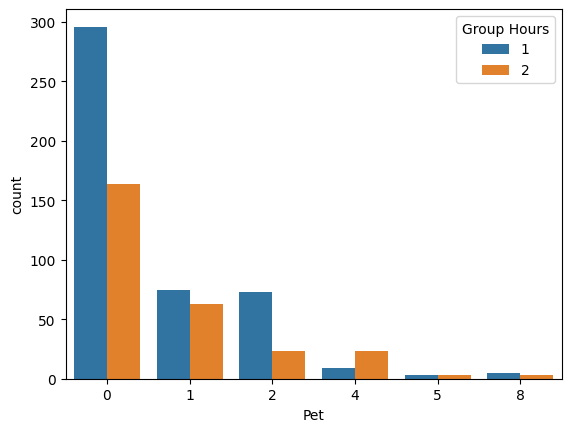

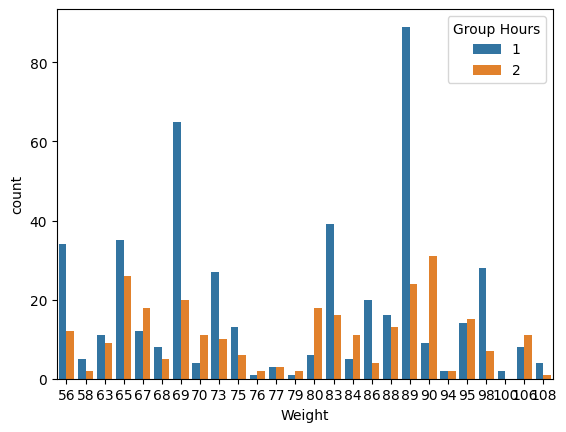

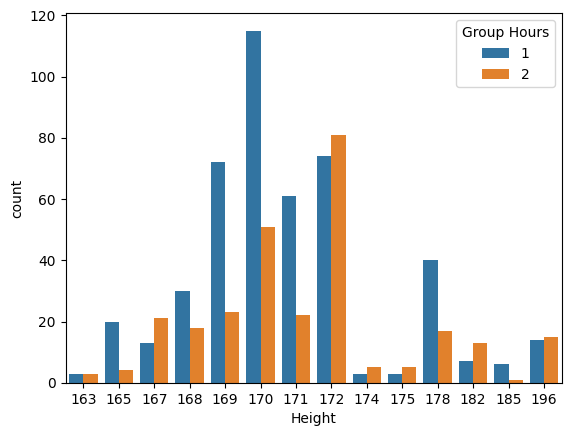

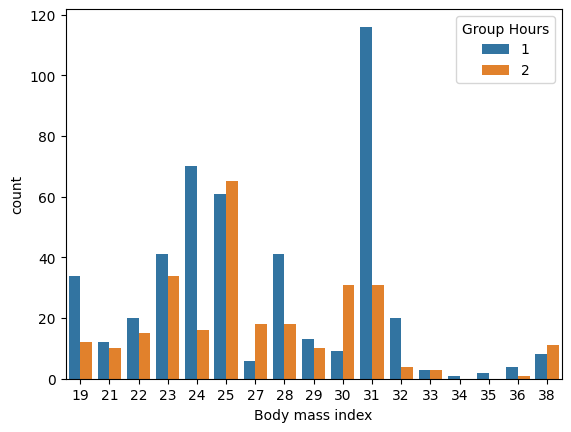

In [180]:
for i, predictor in enumerate(emp_df_copy.drop(columns=['Group Hours', 'Transportation expense', 'Absenteeism time in hours', 'Work load Average/day '])):
    plt.figure(i)
    sns.countplot(data=emp_df_copy, x=predictor, hue='Group Hours')

In [181]:
group_hours = []
for index, row in emp_df_copy.iterrows():
    if row["Absenteeism time in hours"] <= 2: group_hours.append("Half Day")
    # elif row["Absenteeism time in hours"] <= 8: group_hours.append("medium")
    else: group_hours.append("Full/Several Day(s)")

emp_df_copy["Group Hours"] = group_hours
emp_df_copy.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   Hit target  Disciplinary failure  Education  Son  \
0                 239.554          97                     0          1    2   
1                 239.554          97                     1          1    1   
2                 239.554          97                     0          1    0   
3                 239.554          97                     0          1    2   
4                 239.554          97                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours          Group Hours  
0                          4  Full/Several Day(s)  
1                          0             Half Day  
2                          2             Half Day  
3                          4  Full/Several Day(s)  
4                          2             Half Day

In [182]:
emp_df_copy["Education"].value_counts()

Education
1    611
3     79
2     46
4      4
Name: count, dtype: int64

#### Education bins formed: 0-High School Grads ; 1-Grad, Post Grad, PhD

In [183]:
emp_df_copy["Education"] = emp_df_copy['Education'].map({1:0, 2:1, 3:1, 4:1})
emp_df_copy['Education'].value_counts()

Education
0    611
1    129
Name: count, dtype: int64

(array([  6., 153.,  50.,  39., 189.,  51.,  42.,   7.,   1., 202.]),
 array([ 5. ,  9.7, 14.4, 19.1, 23.8, 28.5, 33.2, 37.9, 42.6, 47.3, 52. ]),
 <BarContainer object of 10 artists>)

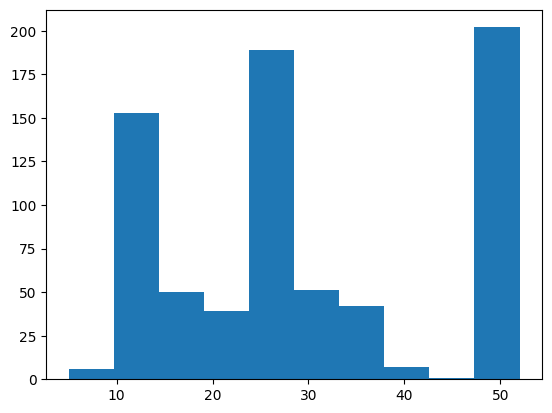

In [184]:
plt.hist(emp_df_copy["Distance from Residence to Work"])

#### Distance from Residence to Work bins formed: Close ; Mid ; Far

In [185]:
distance_col = []
for i,r in emp_df_copy.iterrows():
    if r["Distance from Residence to Work"] < 20: distance_col.append("close")
    elif r["Distance from Residence to Work"] < 40: distance_col.append("mid")
    else: distance_col.append("far")
    

emp_df_copy["Distance from Residence to Work"] = distance_col
emp_df_copy.head()


ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense Distance from Residence to Work  Service time  Age  \
0                     289                             mid            13   33   
1                     118                           close            18   50   
2                     179                             far            18   38   
3                     279                           close            14   39   
4                     289                             mid            13   33   

   Work load Average/day   Hit target  Disciplinary failure  Education  Son  \
0                 239.554          97                     0          0    2   
1                 239.554          97                     1          0    1   
2                 239.554          97                     0          0    0   
3                 239.554          97                     0          0    2   
4                 239.554          97                     0          0    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours          Group Hours  
0                          4  Full/Several Day(s)  
1                          0             Half Day  
2                          2             Half Day  
3                          4  Full/Several Day(s)  
4                          2             Half Day

In [186]:
emp_df_copy["Distance from Residence to Work"].value_counts()

Distance from Residence to Work
mid      321
far      210
close    209
Name: count, dtype: int64

(array([131.,  81.,  80., 241.,  66.,  58.,   2.,  35.,  37.,   9.]),
 array([27. , 29.8, 32.6, 35.4, 38.2, 41. , 43.8, 46.6, 49.4, 52.2, 55. ]),
 <BarContainer object of 10 artists>)

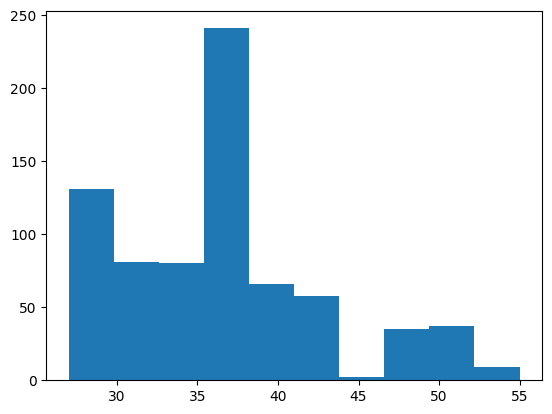

In [187]:
plt.hist(emp_df_copy["Age"])

#### Age bins formed: Young ; Mid ; Old

In [188]:
age_col = []
for i,r in emp_df_copy.iterrows():
    if r["Age"] < 35: age_col.append("young")
    elif r["Age"] < 45: age_col.append("mid")
    else: age_col.append("old")
    

emp_df_copy["Age"] = age_col
emp_df_copy["Age"].value_counts()

Age
mid      365
young    292
old       83
Name: count, dtype: int64

(array([460., 138.,  96.,   0.,   0.,  32.,   6.,   0.,   0.,   8.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

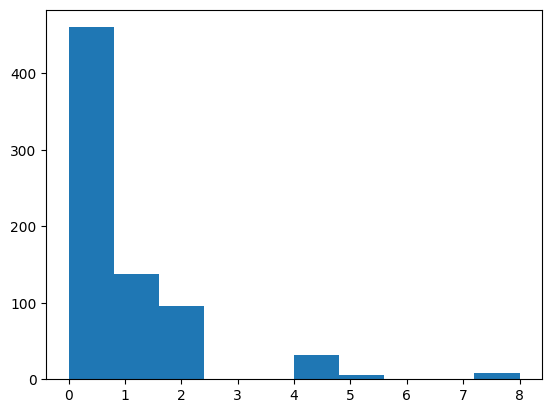

In [189]:
plt.hist(emp_df_copy["Pet"])

#### Pet bins formed: No ; Few ; A lot

In [190]:
pet_col = []
for i,r in emp_df_copy.iterrows():
    if r["Pet"] <= 0: pet_col.append("no")
    elif r["Pet"] <= 2: pet_col.append("few")
    else: pet_col.append("a lot")
    

emp_df_copy["Pet"] = pet_col
emp_df_copy["Pet"].value_counts()

Pet
no       460
few      234
a lot     46
Name: count, dtype: int64

#### Sons bins formed: upto Two Sons ; more than Two Sons

In [191]:
son_col = []
for i,r in emp_df_copy.iterrows():
    if r["Son"] <= 2: son_col.append("upto Two sons")
    else: son_col.append("more than Two Sons")
    

emp_df_copy["Son"] = son_col
emp_df_copy["Son"].value_counts()

Son
upto Two sons         683
more than Two Sons     57
Name: count, dtype: int64

In [192]:
emp_df_copy.head(10)

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   
5   3                  23                 7                6        1   
6  10                  22                 7                6        1   
7  20                  23                 7                6        1   
8  14                  19                 7                2        1   
9   1                  22                 7                2        1   

   Transportation expense Distance from Residence to Work  Service time  \
0                     289                             mid            13   
1                     118                           close            18   
2                     179                             far            18   
3                     279                           close            14   
4                     289                             mid            13   
5                     179                             far            18   
6                     361                             far             3   
7                     260                             far            11   
8                     155                           close            14   
9                     235                           close            14   

     Age  Work load Average/day   Hit target  Disciplinary failure  Education  \
0  young                 239.554          97                     0          0   
1    old                 239.554          97                     1          0   
2    mid                 239.554          97                     0          0   
3    mid                 239.554          97                     0          0   
4  young                 239.554          97                     0          0   
5    mid                 239.554          97                     0          0   
6  young                 239.554          97                     0          0   
7    mid                 239.554          97                     0          0   
8  young                 239.554          97                     0          0   
9    mid                 239.554          97                     0          1   

                  Son  Social drinker  Social smoker    Pet  Weight  Height  \
0       upto Two sons               1              0    few      90     172   
1       upto Two sons               1              0     no      98     178   
2       upto Two sons               1              0     no      89     170   
3       upto Two sons               1              1     no      68     168   
4       upto Two sons               1              0    few      90     172   
5       upto Two sons               1              0     no      89     170   
6       upto Two sons               1              0  a lot      80     172   
7  more than Two Sons               1              0     no      65     168   
8       upto Two sons               1              0     no      95     196   
9       upto Two sons               0              0    few      88     172   

   Body mass index  Absenteeism time in hours          Group Hours  
0               30                          4  Full/Several Day(s)  
1               31                          0             Half Day  
2               31                          2             Half Day  
3               24                          4  Full/Several Day(s)  
4               30                          2             Half Day  
5               31                          2             Half Day  
6               27                          8  Full/Several Day(s)  
7               23                          4  Full/Several

In [193]:
emp_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    object 
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    object 
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [194]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Convert to Categorical columns for One-Hot Encoding (dummies)

In [195]:
cols = ["Age","Seasons","Distance from Residence to Work","Pet", "Son"]
emp_df_copy[cols]=emp_df_copy[cols].astype('category')

In [196]:
emp_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason for absence               740 non-null    int64   
 2   Month of absence                 740 non-null    int64   
 3   Day of the week                  740 non-null    int64   
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    category
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    category
 9   Work load Average/day            740 non-null    float64 
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    int64   
 12  Educatio

In [197]:
emp_df_copy['Son'].value_counts()

Son
upto Two sons         683
more than Two Sons     57
Name: count, dtype: int64

In [198]:
dummies_cols = ["Age","Seasons","Distance from Residence to Work","Pet", "Son"]

emp_df_copy = pd.get_dummies(emp_df_copy,columns= dummies_cols,drop_first=True)
emp_df_copy.head()

ID  Reason for absence  Month of absence  Day of the week  \
0  11                  26                 7                3   
1  36                   0                 7                3   
2   3                  23                 7                4   
3   7                   7                 7                5   
4  11                  23                 7                5   

   Transportation expense  Service time  Work load Average/day   Hit target  \
0                     289            13                 239.554          97   
1                     118            18                 239.554          97   
2                     179            18                 239.554          97   
3                     279            14                 239.554          97   
4                     289            13                 239.554          97   

   Disciplinary failure  Education  Social drinker  Social smoker  Weight  \
0                     0          0               1              0      90   
1                     1          0               1              0      98   
2                     0          0               1              0      89   
3                     0          0               1              1      68   
4                     0          0               1              0      90   

   Height  Body mass index  Absenteeism time in hours          Group Hours  \
0     172               30                          4  Full/Several Day(s)   
1     178               31                          0             Half Day   
2     170               31                          2             Half Day   
3     168               24                          4  Full/Several Day(s)   
4     172               30                          2             Half Day   

   Age_old  Age_young  Seasons_2  Seasons_3  Seasons_4  \
0    False       True      False      False      False   
1     True      False      False      False      False   
2    False      False      False      False      False   
3    False      False      False      False      False   
4    False       True      False      False      False   

   Distance from Residence to Work_far  Distance from Residence to Work_mid  \
0                                False                                 True   
1                                False                                False   
2                                 True                                False   
3                                False                                False   
4                                False                                 True   

   Pet_few  Pet_no  Son_upto Two sons  
0     True   False               True  
1    False    True               True  
2    False    True               True  
3    False    True               True  
4     True   False               True

In [199]:
emp_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   740 non-null    int64  
 1   Reason for absence                   740 non-null    int64  
 2   Month of absence                     740 non-null    int64  
 3   Day of the week                      740 non-null    int64  
 4   Transportation expense               740 non-null    int64  
 5   Service time                         740 non-null    int64  
 6   Work load Average/day                740 non-null    float64
 7   Hit target                           740 non-null    int64  
 8   Disciplinary failure                 740 non-null    int64  
 9   Education                            740 non-null    int64  
 10  Social drinker                       740 non-null    int64  
 11  Social smoker                   

#### Convert records to Numeric type for further work

In [200]:
cols = ["Age_old","Age_young","Seasons_2","Seasons_3", "Seasons_4", "Distance from Residence to Work_far", "Distance from Residence to Work_mid",
        "Pet_few","Pet_no", "Son_upto Two sons"]
emp_df_copy[cols]=emp_df_copy[cols].astype('int64')

In [201]:
emp_df_copy.head()

ID  Reason for absence  Month of absence  Day of the week  \
0  11                  26                 7                3   
1  36                   0                 7                3   
2   3                  23                 7                4   
3   7                   7                 7                5   
4  11                  23                 7                5   

   Transportation expense  Service time  Work load Average/day   Hit target  \
0                     289            13                 239.554          97   
1                     118            18                 239.554          97   
2                     179            18                 239.554          97   
3                     279            14                 239.554          97   
4                     289            13                 239.554          97   

   Disciplinary failure  Education  Social drinker  Social smoker  Weight  \
0                     0          0               1              0      90   
1                     1          0               1              0      98   
2                     0          0               1              0      89   
3                     0          0               1              1      68   
4                     0          0               1              0      90   

   Height  Body mass index  Absenteeism time in hours          Group Hours  \
0     172               30                          4  Full/Several Day(s)   
1     178               31                          0             Half Day   
2     170               31                          2             Half Day   
3     168               24                          4  Full/Several Day(s)   
4     172               30                          2             Half Day   

   Age_old  Age_young  Seasons_2  Seasons_3  Seasons_4  \
0        0          1          0          0          0   
1        1          0          0          0          0   
2        0          0          0          0          0   
3        0          0          0          0          0   
4        0          1          0          0          0   

   Distance from Residence to Work_far  Distance from Residence to Work_mid  \
0                                    0                                    1   
1                                    0                                    0   
2                                    1                                    0   
3                                    0                                    0   
4                                    0                                    1   

   Pet_few  Pet_no  Son_upto Two sons  
0        1       0                  1  
1        0       1                  1  
2        0       1                  1  
3        0       1                  1  
4        1       0                  1

In [202]:
emp_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   740 non-null    int64  
 1   Reason for absence                   740 non-null    int64  
 2   Month of absence                     740 non-null    int64  
 3   Day of the week                      740 non-null    int64  
 4   Transportation expense               740 non-null    int64  
 5   Service time                         740 non-null    int64  
 6   Work load Average/day                740 non-null    float64
 7   Hit target                           740 non-null    int64  
 8   Disciplinary failure                 740 non-null    int64  
 9   Education                            740 non-null    int64  
 10  Social drinker                       740 non-null    int64  
 11  Social smoker                   

#### Model Training

In [203]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB



In [204]:
import lime
from lime import lime_tabular

In [205]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [206]:
emp_df_copy.shape

(740, 27)

In [207]:
ignored_cols = ["Absenteeism time in hours","Group Hours"]
X = emp_df_copy.drop(ignored_cols,axis = 1)
Y = emp_df_copy["Group Hours"]

In [208]:
X.head()

ID  Reason for absence  Month of absence  Day of the week  \
0  11                  26                 7                3   
1  36                   0                 7                3   
2   3                  23                 7                4   
3   7                   7                 7                5   
4  11                  23                 7                5   

   Transportation expense  Service time  Work load Average/day   Hit target  \
0                     289            13                 239.554          97   
1                     118            18                 239.554          97   
2                     179            18                 239.554          97   
3                     279            14                 239.554          97   
4                     289            13                 239.554          97   

   Disciplinary failure  Education  Social drinker  Social smoker  Weight  \
0                     0          0               1              0      90   
1                     1          0               1              0      98   
2                     0          0               1              0      89   
3                     0          0               1              1      68   
4                     0          0               1              0      90   

   Height  Body mass index  Age_old  Age_young  Seasons_2  Seasons_3  \
0     172               30        0          1          0          0   
1     178               31        1          0          0          0   
2     170               31        0          0          0          0   
3     168               24        0          0          0          0   
4     172               30        0          1          0          0   

   Seasons_4  Distance from Residence to Work_far  \
0          0                                    0   
1          0                                    0   
2          0                                    1   
3          0                                    0   
4          0                                    0   

   Distance from Residence to Work_mid  Pet_few  Pet_no  Son_upto Two sons  
0                                    1        1       0                  1  
1                                    0        0       1                  1  
2                                    0        0       1                  1  
3                                    0        0       1                  1  
4                                    1        1       0                  1

In [209]:
Y.head()

0    Full/Several Day(s)
1               Half Day
2               Half Day
3    Full/Several Day(s)
4               Half Day
Name: Group Hours, dtype: object

In [210]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=5)

In [211]:
standard_scaler=StandardScaler()
standard_scaler_fit=standard_scaler.fit(x_train)
xr_train=standard_scaler_fit.transform(x_train)
xr_test=standard_scaler_fit.transform(x_test)

In [212]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=5)

In [213]:
model_lor = LogisticRegression(C=1,penalty='l1', solver='liblinear')

# Creating the model on Training Data
model_lor_fit=model_lor.fit(x_train,y_train)
model_lor_pred=model_lor_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_lor_pred))
print(metrics.confusion_matrix(y_test, model_lor_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_lor_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

                     precision    recall  f1-score   support

Full/Several Day(s)       0.80      0.76      0.78        72
           Half Day       0.60      0.64      0.62        39

           accuracy                           0.72       111
          macro avg       0.70      0.70      0.70       111
       weighted avg       0.73      0.72      0.72       111

[[55 17]
 [14 25]]
Accuracy of the model on Testing Sample Data: 0.72


In [214]:
model_dt = DecisionTreeClassifier(criterion="gini", random_state=70, max_depth=10, min_samples_leaf=14)

# Creating the model on Training Data
model_dt_fit=model_dt.fit(x_train,y_train)
model_dt_pred=model_dt_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_dt_pred))
print(metrics.confusion_matrix(y_test, model_dt_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_dt_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

                     precision    recall  f1-score   support

Full/Several Day(s)       0.88      0.85      0.87        72
           Half Day       0.74      0.79      0.77        39

           accuracy                           0.83       111
          macro avg       0.81      0.82      0.82       111
       weighted avg       0.83      0.83      0.83       111

[[61 11]
 [ 8 31]]
Accuracy of the model on Testing Sample Data: 0.83


In [215]:
model_rf = RandomForestClassifier(max_depth=15, n_estimators=150, criterion='gini', random_state=8)

# Creating the model on Training Data
model_rf_fit=model_rf.fit(x_train,y_train)
model_rf_pred=model_rf_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_rf_pred))
print(metrics.confusion_matrix(y_test, model_rf_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_rf_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

                     precision    recall  f1-score   support

Full/Several Day(s)       0.86      0.86      0.86        72
           Half Day       0.74      0.74      0.74        39

           accuracy                           0.82       111
          macro avg       0.80      0.80      0.80       111
       weighted avg       0.82      0.82      0.82       111

[[62 10]
 [10 29]]
Accuracy of the model on Testing Sample Data: 0.82


In [216]:
dt=DecisionTreeClassifier(max_depth=15)
model_ada = AdaBoostClassifier(n_estimators=100, estimator=dt ,learning_rate=0.04)

# Creating the model on Training Data
model_ada_fit=model_ada.fit(x_train,y_train)
model_ada_pred=model_ada_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_ada_pred))
print(metrics.confusion_matrix(y_test, model_ada_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_ada_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

                     precision    recall  f1-score   support

Full/Several Day(s)       0.81      0.71      0.76        72
           Half Day       0.56      0.69      0.62        39

           accuracy                           0.70       111
          macro avg       0.69      0.70      0.69       111
       weighted avg       0.72      0.70      0.71       111

[[51 21]
 [12 27]]
Accuracy of the model on Testing Sample Data: 0.71


In [217]:
model_xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=200, booster='gbtree', gamma=4)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# Creating the model on Training Data
model_xgb_fit=model_xgb.fit(x_train,y_train)
model_xgb_pred=model_xgb_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_xgb_pred))
print(metrics.confusion_matrix(y_test, model_xgb_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_xgb_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        72
           1       0.73      0.82      0.77        39

    accuracy                           0.83       111
   macro avg       0.81      0.83      0.82       111
weighted avg       0.84      0.83      0.83       111

[[60 12]
 [ 7 32]]
Accuracy of the model on Testing Sample Data: 0.83


In [218]:
model_gbm = GradientBoostingClassifier(loss='log_loss', n_estimators=140, learning_rate=0.5, criterion='friedman_mse')

# Creating the model on Training Data
model_gbm_fit=model_gbm.fit(x_train,y_train)
model_gbm_pred=model_gbm_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_gbm_pred))
print(metrics.confusion_matrix(y_test, model_gbm_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_gbm_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        72
           1       0.66      0.74      0.70        39

    accuracy                           0.77       111
   macro avg       0.75      0.77      0.76       111
weighted avg       0.78      0.77      0.78       111

[[57 15]
 [10 29]]
Accuracy of the model on Testing Sample Data: 0.78


In [219]:
test_1 = x_train.iloc[44]
test_2 = x_train.iloc[2]
test_3 = x_train.iloc[288]

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['Half Day', 'Full/Several Days'],
    mode='classification', verbose=True
)


In [220]:
lime_exp_1 = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model_xgb_fit.predict_proba, num_features=11
)

Intercept 0.39871948462607915
Prediction_local [0.12468702]
Right: 0.071577124


In [221]:
lime_exp_2 = lime_explainer.explain_instance(
    data_row=test_2,
    predict_fn=model_xgb_fit.predict_proba, num_features=11
)

Intercept 0.2320222024894343
Prediction_local [0.51540101]
Right: 0.42145354


In [222]:
lime_exp_3 = lime_explainer.explain_instance(
    data_row=test_3,
    predict_fn=model_xgb_fit.predict_proba, num_features=11
)

Intercept 0.24492677309892522
Prediction_local [0.57736906]
Right: 0.53613394


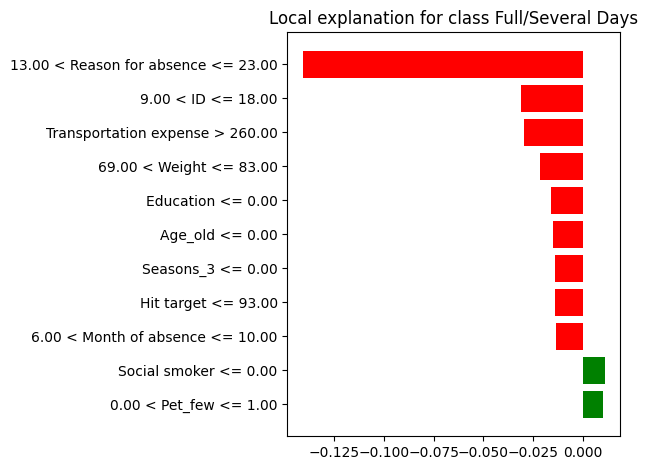

In [223]:
plt=lime_exp_1.as_pyplot_figure()
plt.tight_layout()

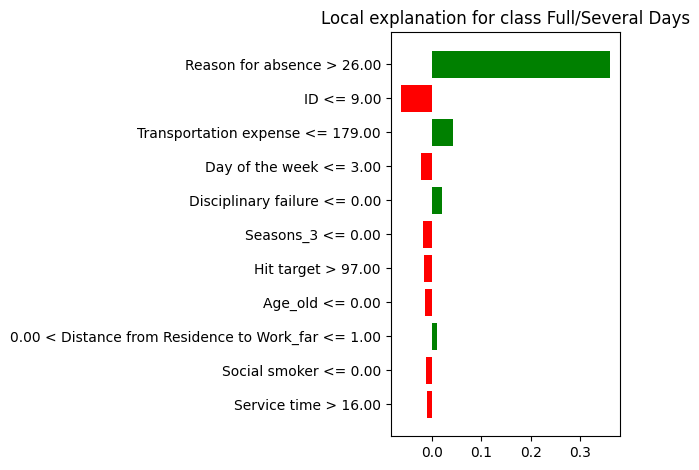

In [224]:
plt=lime_exp_2.as_pyplot_figure()
plt.tight_layout()

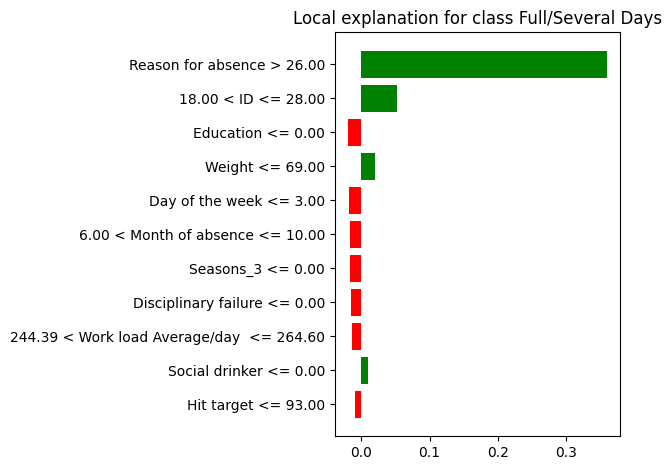

In [225]:
plt=lime_exp_3.as_pyplot_figure()
plt.tight_layout()

In [226]:
lime_exp_1.show_in_notebook(show_table=True)

In [227]:
lime_exp_3.show_in_notebook(show_table=True)

In [228]:
import shap
shap.initjs()

In [234]:
shap_explainer = shap.TreeExplainer(model_xgb_fit)
shap_values = shap_explainer.shap_values(X)

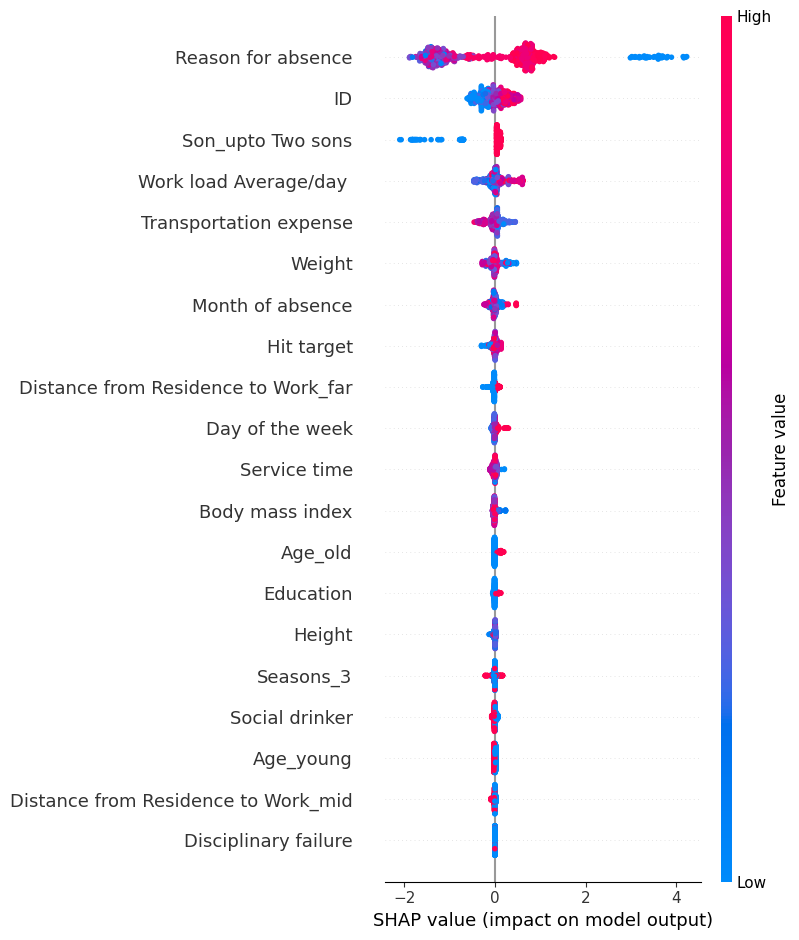

In [235]:
shap.summary_plot(shap_values, X)

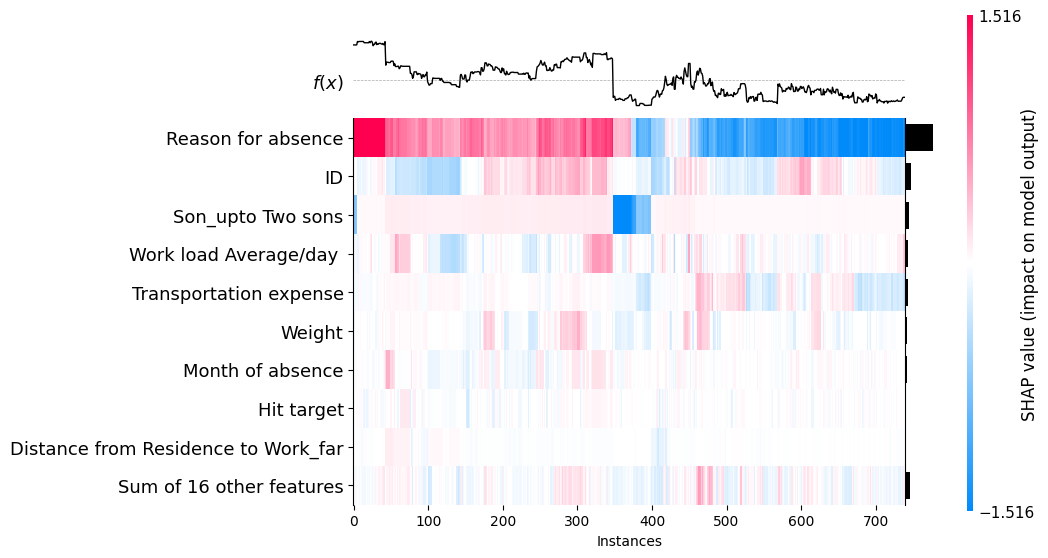

In [236]:
shap_values1 = shap_explainer(X[:740])
shap.plots.heatmap(shap_values1)

In [237]:
shap.force_plot(shap_explainer.expected_value, shap_values[0, :], test_3)

In [238]:
shap.force_plot(shap_explainer.expected_value, shap_values[0, :], test_2)

In [239]:
shap.force_plot(shap_explainer.expected_value, shap_values[0, :], test_1)

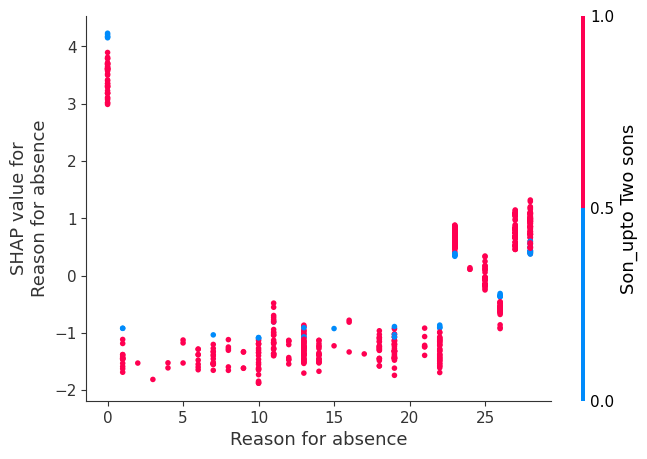

In [240]:
shap.dependence_plot('Reason for absence', shap_values, X)

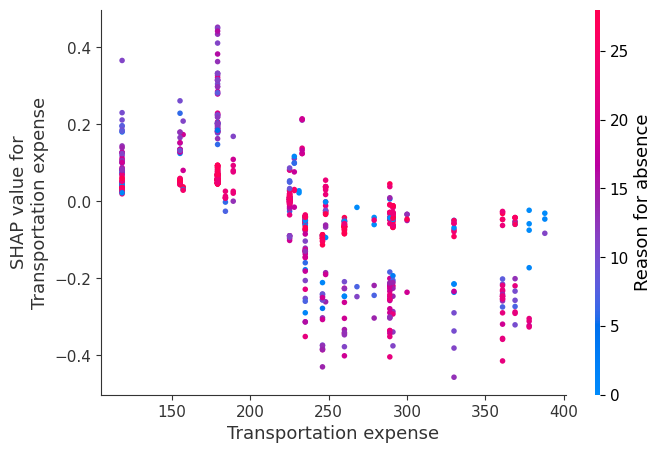

In [241]:
shap.dependence_plot('Transportation expense', shap_values, X)

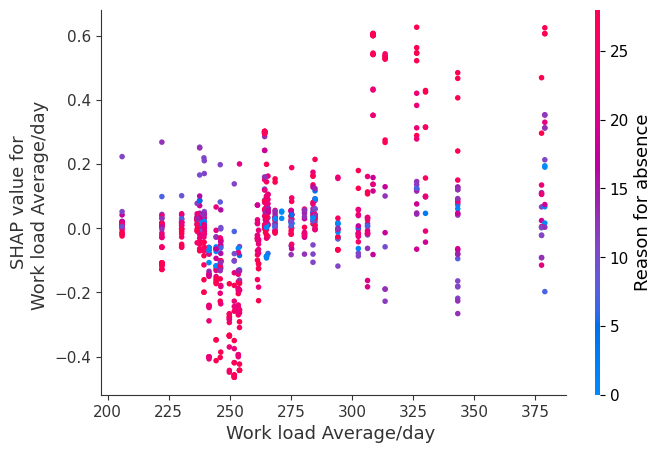

In [242]:
shap.dependence_plot('Work load Average/day ', shap_values, X)

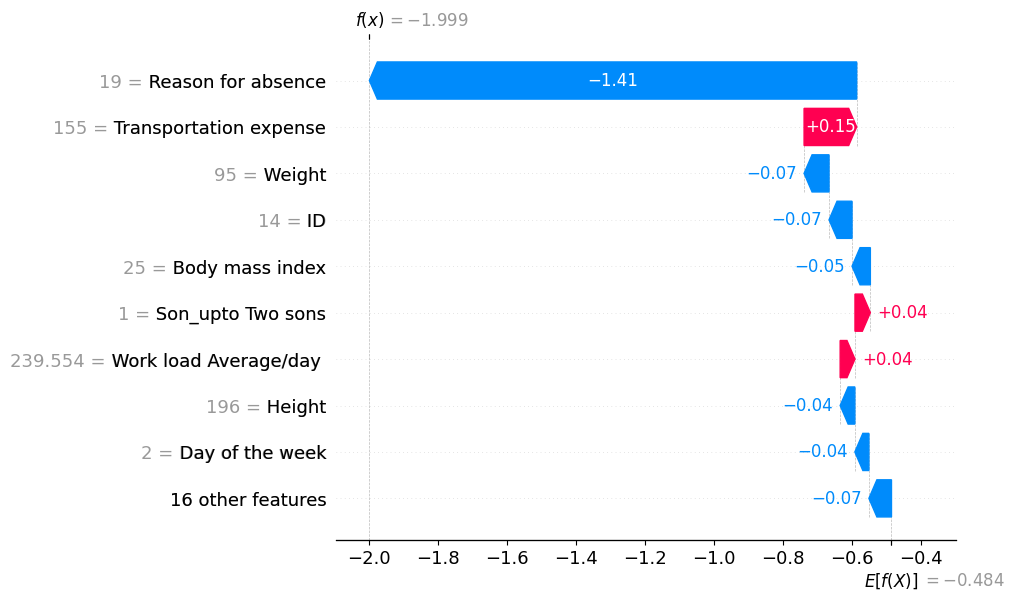

In [246]:
shap_values2 = shap_explainer(X)
shap.plots.waterfall(shap_values2[8])

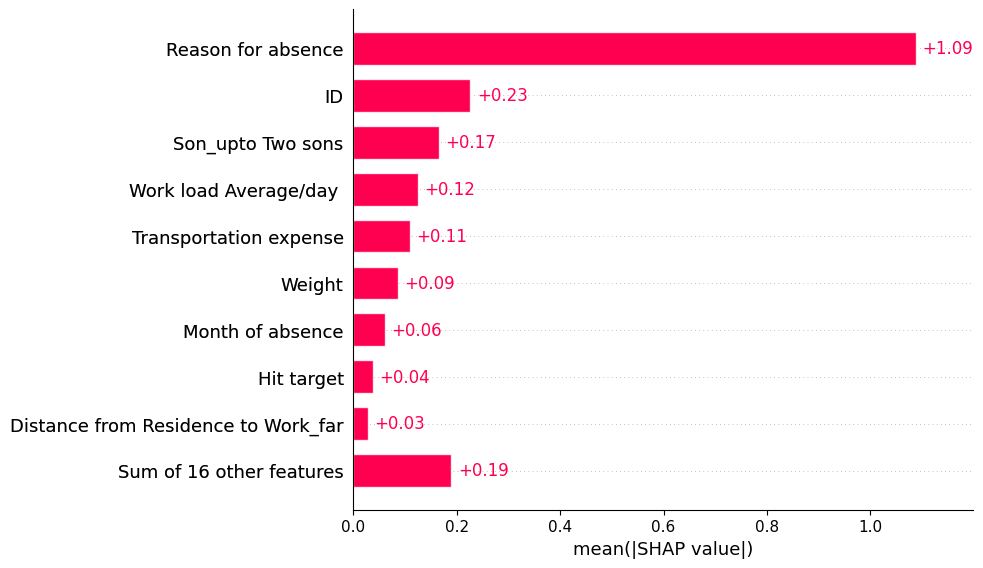

In [247]:
explainer = shap.Explainer(model_xgb_fit)
shap_values = explainer(X)
shap.plots.bar(shap_values)

In [248]:
emp_df_copy.iloc[729]

ID                                                       9
Reason for absence                                       6
Month of absence                                         7
Day of the week                                          3
Transportation expense                                 228
Service time                                            16
Work load Average/day                              264.604
Hit target                                              93
Disciplinary failure                                     0
Education                                                0
Social drinker                                           0
Social smoker                                            0
Weight                                                  65
Height                                                 172
Body mass index                                         22
Absenteeism time in hours                              120
Group Hours                            Full/Several Day(

In [250]:
prediction = model_xgb_fit.predict(np.array([[9,	6,	7,	3,	228,	16,	264.604,	93,	0,	0,	0,	0,	65,	172,	22,		1,	0,	0,	0,	0,	0,	0,	1,	0,	0]]))

print("Absenteeism : 0-> Full , and 1-> Half :", prediction)

Absenteeism : 0-> Full , and 1-> Half : [0]
